In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

In [73]:
# plot 
y_test_0 = np.load('/Users/lilu/Desktop/y_test_vars_0.npy')
y_pred_0 = np.load('/Users/lilu/Desktop/y_pred_vars_0.npy')
y_test_1 = np.load('/Users/lilu/Desktop/y_test_vars_1.npy')
y_pred_1 = np.load('/Users/lilu/Desktop/y_pred_vars_1.npy')
y_test_2 = np.load('/Users/lilu/Desktop/y_test_vars_2.npy')
y_pred_2 = np.load('/Users/lilu/Desktop/y_pred_vars_2.npy')
y_test_3 = np.load('/Users/lilu/Desktop/y_test_vars_3.npy')
y_pred_3 = np.load('/Users/lilu/Desktop/y_pred_vars_3.npy')
y_test_4 = np.load('/Users/lilu/Desktop/y_test_vars_4.npy')
y_pred_4 = np.load('/Users/lilu/Desktop/y_pred_vars_4.npy')
y_test_5 = np.load('/Users/lilu/Desktop/y_test_vars_5.npy')
y_pred_5 = np.load('/Users/lilu/Desktop/y_pred_vars_5.npy')
lat_lon = np.load('/Users/lilu/Desktop/gd_lat_lon.npy')

def plot_spatial_mean(y_pred, y_test, vars):
    #plt.figure(figsize=(20, 5))
    plt.plot(np.nanmean(y_pred, axis=0))
    plt.plot(np.nanmean(y_test, axis=0))
    plt.xlabel('time (day)')
    plt.ylabel(vars)
    plt.legend(['pred', 'obs'])

def cal_r2(y_pred, y_test):
    r2 = np.full((y_pred.shape[0],), np.nan)
    for i in range(y_pred.shape[0]):
        a, b = y_pred[i], y_test[i]
        if not np.isnan(b).any():
            r2[i] = (r2_score(b, a))
        elif np.isnan(b).all():
            pass
        else:
            a = np.delete(a, np.where(np.isnan(b)))
            b = np.delete(b, np.where(np.isnan(b)))
            r2[i] = (r2_score(b, a))
    return r2

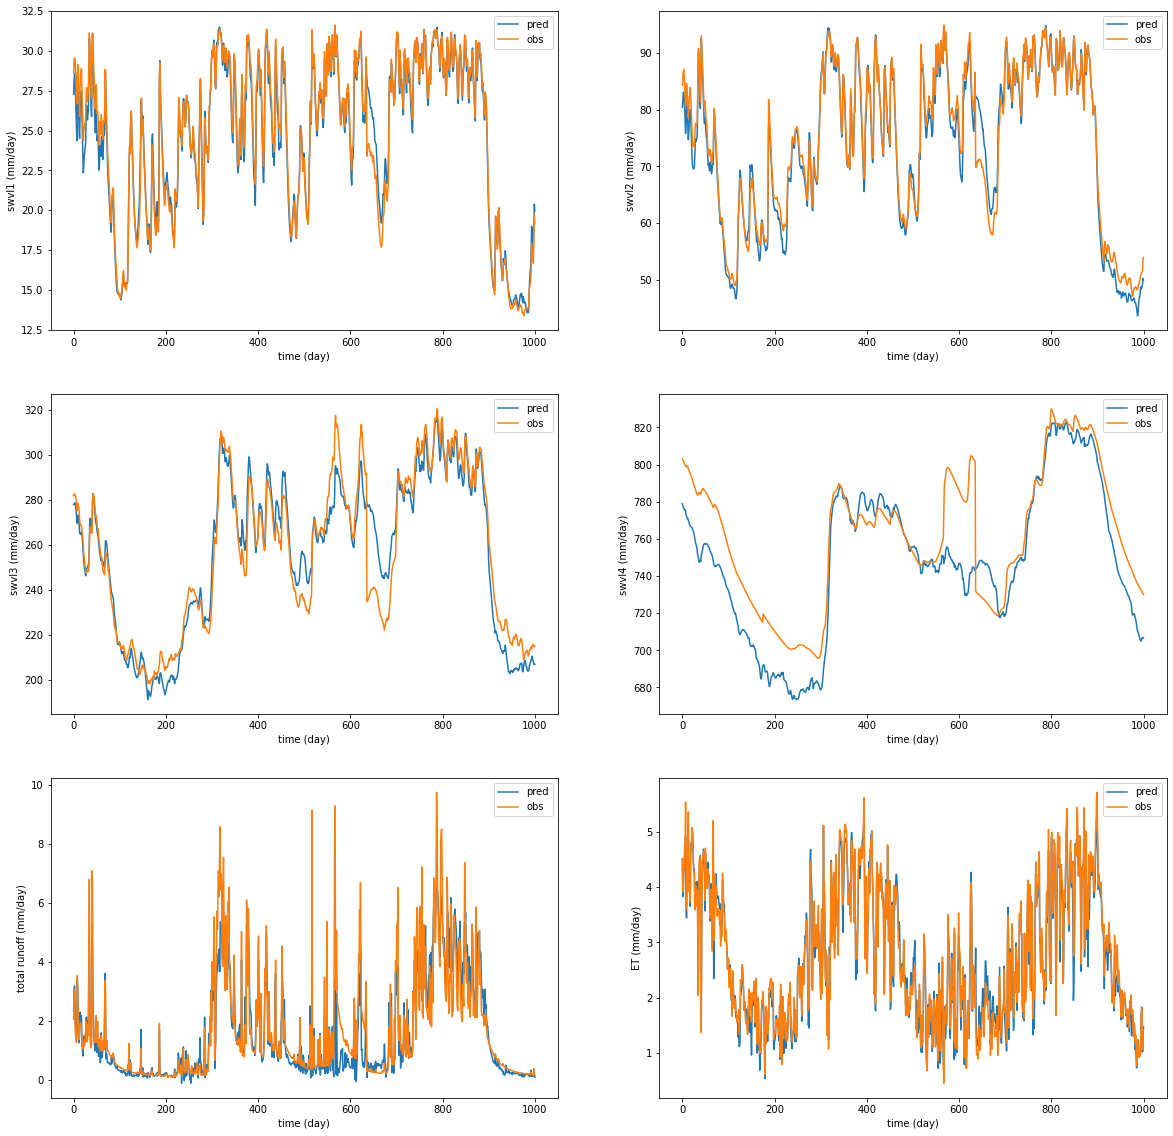

In [74]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plot_spatial_mean(y_pred_0*70, y_test_0*70, "swvl1 (mm/day)")
plt.subplot(3, 2, 2)
plot_spatial_mean(y_pred_1*210, y_test_1*210, "swvl2 (mm/day)")
plt.subplot(3, 2, 3)
plot_spatial_mean(y_pred_2*720, y_test_2*720, "swvl3 (mm/day)")
plt.subplot(3, 2, 4)
plot_spatial_mean(y_pred_3*1890, y_test_3*1890, "swvl4 (mm/day)")
plt.subplot(3, 2, 5)
plot_spatial_mean(y_pred_4, y_test_4, "total runoff (mm/day)")
plt.subplot(3, 2, 6)
plot_spatial_mean(y_pred_5, y_test_5, "ET (mm/day)")
plt.savefig('1.pdf')

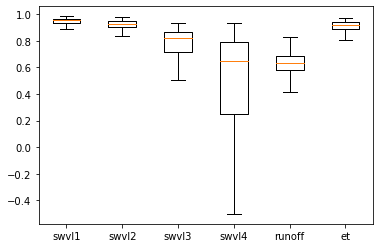

In [83]:
r2_0 = cal_r2(y_pred_0, y_test_0)
r2_1 = cal_r2(y_pred_1, y_test_1)
r2_2 = cal_r2(y_pred_2, y_test_2)
r2_3 = cal_r2(y_pred_3, y_test_3)
r2_4 = cal_r2(y_pred_4, y_test_4)
r2_5 = cal_r2(y_pred_5, y_test_5)

r2_0[np.isnan(r2_0)] = 0
r2_1[np.isnan(r2_1)] = 0
r2_2[np.isnan(r2_2)] = 0
r2_3[np.isnan(r2_3)] = 0
r2_4[np.isnan(r2_4)] = 0
r2_5[np.isnan(r2_5)] = 0

plt.figure()
ax = plt.subplot(111)
ax.boxplot([r2_0, r2_1, r2_2, r2_3, r2_4, r2_5], showfliers=False)
ax.set_xticklabels(['swvl1', 'swvl2','swvl3','swvl4','runoff','et'])
plt.savefig('2.pdf')


117.0 109.75 25.5 20.5
21 30


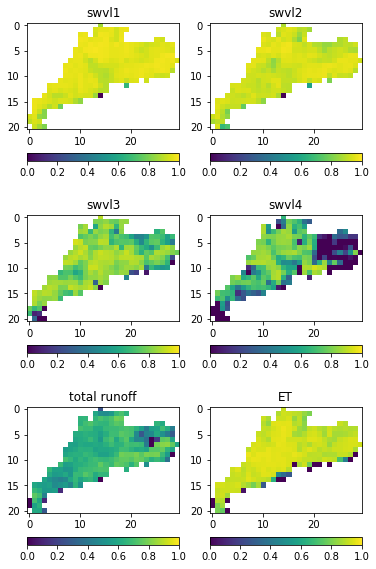

In [90]:
# append to image
lon, lat = lat_lon[:,0], lat_lon[:,1]
a, b = np.max(lon), np.min(lon)
c, d = np.max(lat), np.min(lat)

print(a, b, c, d)
lat_interval, lon_interval = int((c-d)/0.25+1), int((a-b)/0.25+1)
print(lat_interval, lon_interval)

metrics = np.full((lat_interval,lon_interval, 6), np.nan)
for i in range(lat_lon.shape[0]):
    lon_, lat_ = lat_lon[i,0], lat_lon[i,1]
    m = int((lon_-b)/0.25)
    n = int((lat_-d)/0.25)
    metrics[lat_interval-n-1, m, 0] = r2_0[i]
    metrics[lat_interval-n-1, m, 1] = r2_1[i]
    metrics[lat_interval-n-1, m, 2] = r2_2[i]
    metrics[lat_interval-n-1, m, 3] = r2_3[i]
    metrics[lat_interval-n-1, m, 4] = r2_4[i]
    metrics[lat_interval-n-1, m, 5] = r2_5[i]

name = ['swvl1','swvl2','swvl3','swvl4','total runoff','ET']
plt.figure(figsize=(6, 10))
for i in range(6):
    plt.subplot(3, 2, i+1)
    plt.imshow(metrics[:,:,i], vmin=0, vmax=1)
    plt.title(name[i])
    plt.colorbar(orientation='horizontal')

plt.savefig('3.pdf')

In [119]:
y_test = np.load('/Users/lilu/Desktop/y_test_multivars.npy')
y_pred = np.load('/Users/lilu/Desktop/y_pred_multivars.npy')

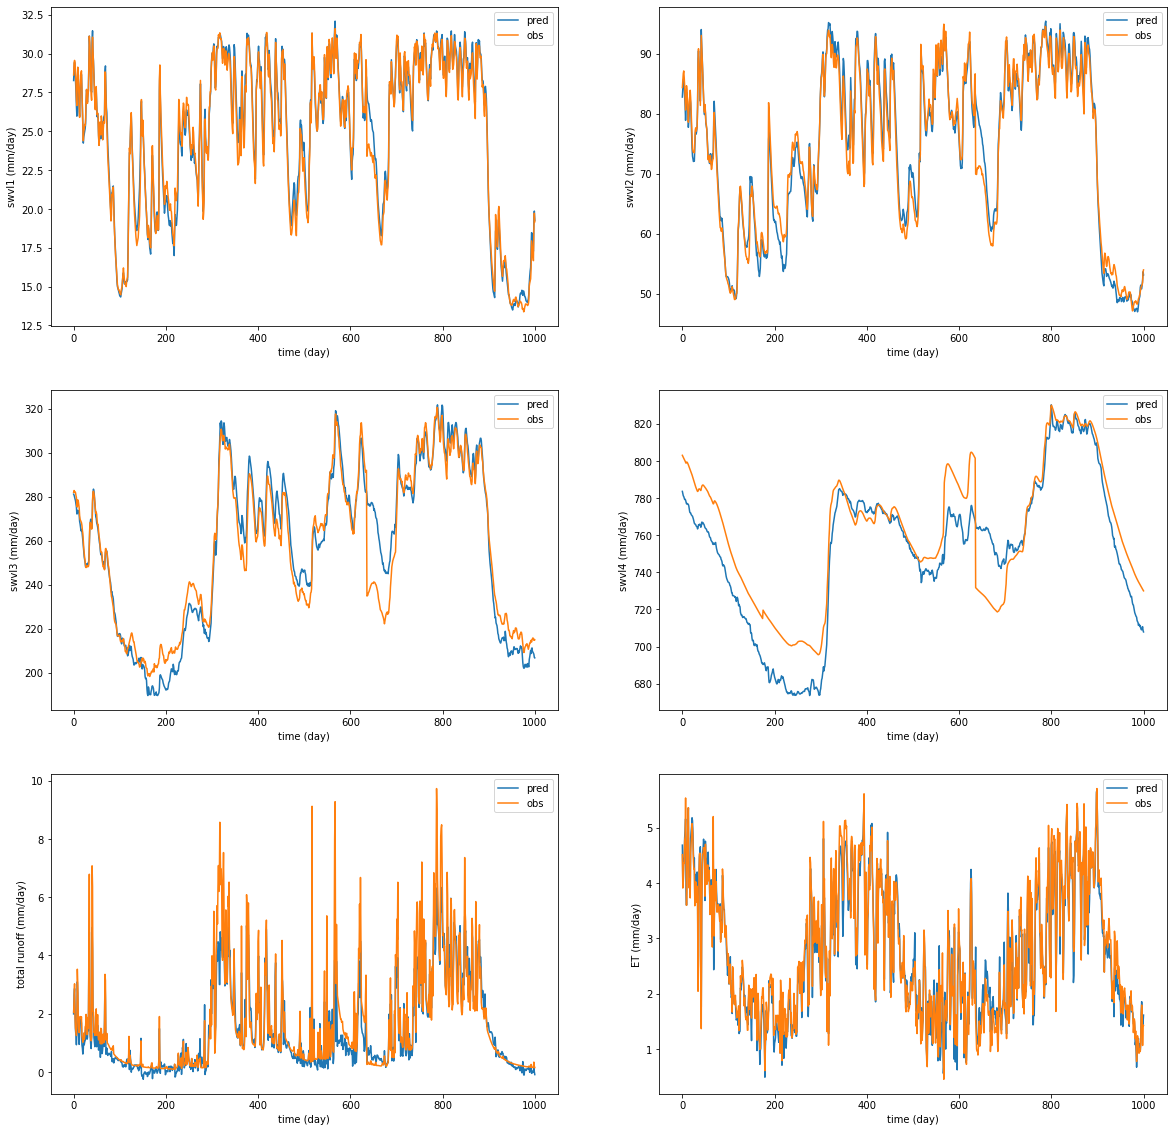

In [120]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plot_spatial_mean(y_pred[:,:,0]*70, y_test[:,:,0]*70, "swvl1 (mm/day)")
plt.subplot(3, 2, 2)
plot_spatial_mean(y_pred[:,:,1]*210, y_test[:,:,1]*210, "swvl2 (mm/day)")
plt.subplot(3, 2, 3)
plot_spatial_mean(y_pred[:,:,2]*720, y_test[:,:,2]*720, "swvl3 (mm/day)")
plt.subplot(3, 2, 4)
plot_spatial_mean(y_pred[:,:,3]*1890, y_test[:,:,3]*1890, "swvl4 (mm/day)")
plt.subplot(3, 2, 5)
plot_spatial_mean(y_pred[:,:,4], y_test[:,:,4], "total runoff (mm/day)")
plt.subplot(3, 2, 6)
plot_spatial_mean(y_pred[:,:,5], y_test[:,:,5], "ET (mm/day)")
plt.savefig('4.pdf')

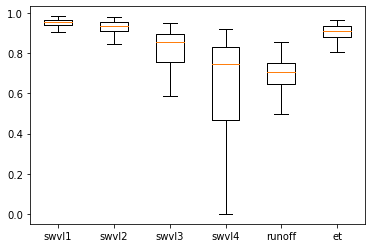

In [134]:
r2_0 = cal_r2(y_pred[:,:,0], y_test[:,:,0])
r2_1 = cal_r2(y_pred[:,:,1], y_test[:,:,1])
r2_2 = cal_r2(y_pred[:,:,2], y_test[:,:,2])
r2_3 = cal_r2(y_pred[:,:,3], y_test[:,:,3])
r2_4 = cal_r2(y_pred[:,:,4], y_test[:,:,4])
r2_5 = cal_r2(y_pred[:,:,5], y_test[:,:,5])


r2_0[np.isnan(r2_0)] = 0
r2_1[np.isnan(r2_1)] = 0
r2_2[np.isnan(r2_2)] = 0
r2_3[np.isnan(r2_3)] = 0
r2_4[np.isnan(r2_4)] = 0
r2_5[np.isnan(r2_5)] = 0


r2_0[r2_0<0] = 0
r2_1[r2_1<0] = 0
r2_2[r2_2<0] = 0
r2_3[r2_3<0] = 0
r2_4[r2_4<0] = 0
r2_5[r2_5<0] = 0


plt.figure()
ax = plt.subplot(111)
ax.boxplot([r2_0, r2_1, r2_2, r2_3, r2_4, r2_5], showfliers=False)
ax.set_xticklabels(['swvl1', 'swvl2','swvl3','swvl4','runoff','et'])
plt.savefig('5.pdf')

117.0 109.75 25.5 20.5
21 30


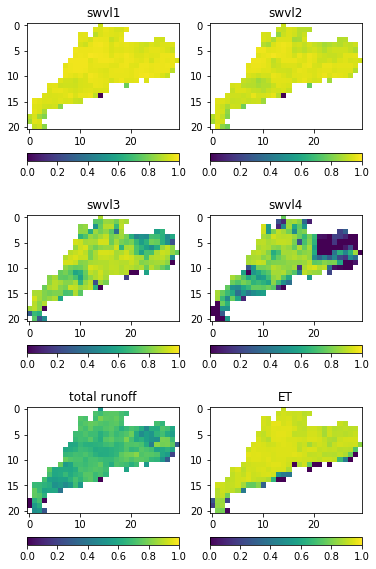

In [107]:
# append to image
lon, lat = lat_lon[:,0], lat_lon[:,1]
a, b = np.max(lon), np.min(lon)
c, d = np.max(lat), np.min(lat)

print(a, b, c, d)
lat_interval, lon_interval = int((c-d)/0.25+1), int((a-b)/0.25+1)
print(lat_interval, lon_interval)

metrics = np.full((lat_interval,lon_interval, 6), np.nan)
for i in range(lat_lon.shape[0]):
    lon_, lat_ = lat_lon[i,0], lat_lon[i,1]
    m = int((lon_-b)/0.25)
    n = int((lat_-d)/0.25)
    metrics[lat_interval-n-1, m, 0] = r2_0[i]
    metrics[lat_interval-n-1, m, 1] = r2_1[i]
    metrics[lat_interval-n-1, m, 2] = r2_2[i]
    metrics[lat_interval-n-1, m, 3] = r2_3[i]
    metrics[lat_interval-n-1, m, 4] = r2_4[i]
    metrics[lat_interval-n-1, m, 5] = r2_5[i]

name = ['swvl1','swvl2','swvl3','swvl4','total runoff','ET']
plt.figure(figsize=(6, 10))
for i in range(6):
    plt.subplot(3, 2, i+1)
    plt.imshow(metrics[:,:,i], vmin=0, vmax=1)
    plt.title(name[i])
    plt.colorbar(orientation='horizontal')

plt.savefig('6.pdf')

In [133]:
y_test = np.load('/Users/lilu/Desktop/case2-multivars/y_test_multivars.npy')
y_pred = np.load('/Users/lilu/Desktop/case2-multivars/y_pred_multivars.npy')

In [132]:
tt = [r2_0, r2_1, r2_2, r2_3, r2_4, r2_5]

In [136]:
cc = [r2_0, r2_1, r2_2, r2_3, r2_4, r2_5]
print(np.nanmean(cc[0]), np.nanmean(tt[0]))
print(np.nanmean(cc[1]), np.nanmean(tt[1]))
print(np.nanmean(cc[2]), np.nanmean(tt[2]))
print(np.nanmean(cc[3]), np.nanmean(tt[3]))
print(np.nanmean(cc[4]), np.nanmean(tt[4]))
print(np.nanmean(cc[5]), np.nanmean(tt[5]))

0.9447156342846279 0.947985677569016
0.9244795948514819 0.9257461768205737
0.7902587768362143 0.7831309982689673
0.6124645387569126 0.5831224718239163
0.677231172591949 0.6539279101111604
0.8509289573578509 0.858436830868685


117.0 109.75 25.5 20.5
21 30
-9746137.308086492 -9721208.471952068
-10649220.892617717 -10576155.98579786
-11082292.404027624 -10989807.051971538
0.5719989807193158 0.5118454975110311
0.6650550647284698 0.6450567262581329
0.8466427225550269 0.8523441915074166
(256,)
-9746137.308086492 -9721208.471952068
-10649220.892617717 -10576155.98579786
-11082292.404027624 -10989807.051971538
0.5719989807193158 0.5118454975110311
0.6650550647284698 0.6450567262581329
0.8466427225550269 0.8523441915074166
(256,)
-9746137.308086492 -9721208.471952068
-10649220.892617717 -10576155.98579786
-11082292.404027624 -10989807.051971538
0.5719989807193158 0.5118454975110311
0.6650550647284698 0.6450567262581329
0.8466427225550269 0.8523441915074166
(256,)
-9746137.308086492 -9721208.471952068
-10649220.892617717 -10576155.98579786
-11082292.404027624 -10989807.051971538
0.5719989807193158 0.5118454975110311
0.6650550647284698 0.6450567262581329
0.8466427225550269 0.8523441915074166
(256,)
-9746137.308086492 

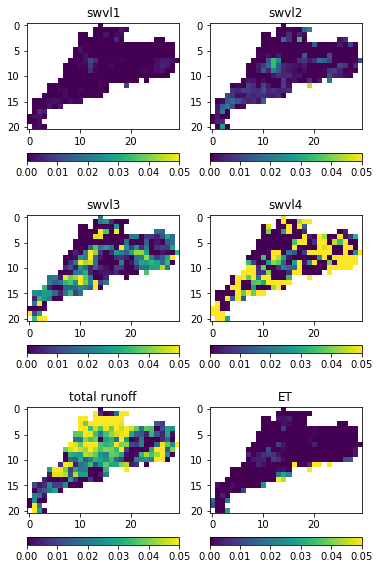

In [115]:
# append to image
lon, lat = lat_lon[:,0], lat_lon[:,1]
a, b = np.max(lon), np.min(lon)
c, d = np.max(lat), np.min(lat)

print(a, b, c, d)
lat_interval, lon_interval = int((c-d)/0.25+1), int((a-b)/0.25+1)
print(lat_interval, lon_interval)

metrics = np.full((lat_interval,lon_interval, 6), np.nan)
for i in range(lat_lon.shape[0]):
    lon_, lat_ = lat_lon[i,0], lat_lon[i,1]
    m = int((lon_-b)/0.25)
    n = int((lat_-d)/0.25)
    metrics[lat_interval-n-1, m, 0] = cc[0][i]-tt[0][i]
    metrics[lat_interval-n-1, m, 1] = cc[1][i]-tt[1][i]
    metrics[lat_interval-n-1, m, 2] = cc[2][i]-tt[2][i]
    metrics[lat_interval-n-1, m, 3] = cc[3][i]-tt[3][i]
    metrics[lat_interval-n-1, m, 4] = cc[4][i]-tt[4][i]
    metrics[lat_interval-n-1, m, 5] = cc[5][i]-tt[5][i]

name = ['swvl1','swvl2','swvl3','swvl4','total runoff','ET']
plt.figure(figsize=(6, 10))
for i in range(6):
    plt.subplot(3, 2, i+1)
    plt.imshow(metrics[:,:,i], vmin=0, vmax=0.05)
    plt.title(name[i])
    plt.colorbar(orientation='horizontal')

plt.savefig('6.pdf')

In [65]:
# physical consistency
y_test_0 = np.load('/Users/lilu/Desktop/case1-explicit/y_test_vars_0.npy')
y_pred_0 = np.load('/Users/lilu/Desktop/case1-explicit/y_pred_vars_0.npy')
y_test_1 = np.load('/Users/lilu/Desktop/case1-explicit/y_test_vars_1.npy')
y_pred_1 = np.load('/Users/lilu/Desktop/case1-explicit/y_pred_vars_1.npy')
y_test_2 = np.load('/Users/lilu/Desktop/case1-explicit/y_test_vars_2.npy')
y_pred_2 = np.load('/Users/lilu/Desktop/case1-explicit/y_pred_vars_2.npy')
y_test_3 = np.load('/Users/lilu/Desktop/case1-explicit/y_test_vars_3.npy')
y_pred_3 = np.load('/Users/lilu/Desktop/case1-explicit/y_pred_vars_3.npy')
y_test_4 = np.load('/Users/lilu/Desktop/case1-explicit/y_test_vars_4.npy')
y_pred_4 = np.load('/Users/lilu/Desktop/case1-explicit/y_pred_vars_4.npy')
y_test_5 = np.load('/Users/lilu/Desktop/case1-explicit/y_test_vars_5.npy')
y_pred_5 = np.load('/Users/lilu/Desktop/case1-explicit/y_pred_vars_5.npy')
y_test_case1 = np.concatenate([y_test_0,y_test_1,y_test_2,y_test_3,y_test_4,y_test_5], axis=-1)
y_pred_case1 = np.concatenate([y_pred_0,y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5], axis=-1)

y_pred_case2 = np.load('/Users/lilu/Desktop/case2-multivars/y_pred_multivars.npy')
y_test_case2 = np.load('/Users/lilu/Desktop/case2-multivars/y_test_multivars.npy')

y_pred_case3 = np.load('/Users/lilu/Desktop/case3-multivars+finetune/y_pred_multivars.npy')
y_test_case3 = np.load('/Users/lilu/Desktop/case3-multivars+finetune/y_test_multivars.npy')

p_test = np.load('/Users/lilu/Desktop/p_test.npy')

y_test = np.load('/Users/lilu/Desktop/y_test.npy')

In [66]:
y_test.shape

(256, 1365, 6)

In [72]:
swvl1 = y_test[:,364:,0]*70
swvl2 = y_test[:,364:,1]*210
swvl3 = y_test[:,364:,2]*720
swvl4 = y_test[:,364:,3]*1890
swvl = swvl1+swvl2+swvl3+swvl4

r = y_test_case1[:,:-1,4]
et = y_test_case1[:,:-1,5]

delta = np.diff(swvl, axis=-1)

In [73]:
print(r.shape)

(256, 1000)


In [74]:
def physical_consistency_ratio(p, deltaswvl, r, et):
    return p-(r+et+deltaswvl)

a = physical_consistency_ratio(p_test[:,:-1,0],delta,r, et)

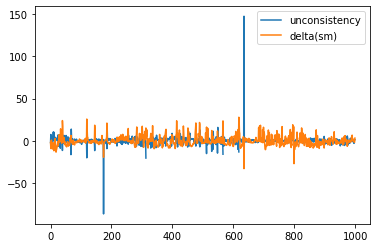

In [77]:
plt.plot(a[10])
plt.plot(delta[0])
#plt.plot(p_test[0,1:])
plt.legend(['unconsistency','delta(sm)','precipitation'])